In [6]:
import re
import numpy as np
import pandas as pd
from pprint import pprint
import pickle
import numpy as np

# Gensim
import gensim
from gensim import corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
#from gensim.parsing.preprocessing import STOPWORDS

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import  pyLDAvis.gensim # don't skip this
from matplotlib import pyplot as plt


import nltk
from nltk.corpus import stopwords

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [2]:
import os
cwd = os.getcwd()
data_dir = os.path.join(cwd,'Category Dataframe')
os.chdir(data_dir)

df1 = pd.read_pickle("df_1_0.001.pkl")
df2 = pd.read_pickle("df_2_0.001.pkl")
df3 = pd.read_pickle("df_3_0.001.pkl")
df4 = pd.read_pickle("df_4_0.001.pkl")
df5 = pd.read_pickle("df_5_0.001.pkl")
df6 = pd.read_pickle("df_6_0.001.pkl")
df7 = pd.read_pickle("df_7_0.001.pkl")
df8 = pd.read_pickle("df_8_0.001.pkl")
df9 = pd.read_pickle("df_9_0.001.pkl")
df10 = pd.read_pickle("df_10_0.001.pkl")
df11 = pd.read_pickle("df_11_0.001.pkl")
df12 = pd.read_pickle("df_12_0.001.pkl")
df13 = pd.read_pickle("df_13_0.001.pkl")
df14 = pd.read_pickle("df_14_0.001.pkl")
df15 = pd.read_pickle("df_15_0.001.pkl")
df16 = pd.read_pickle("df_16_0.001.pkl")
df17 = pd.read_pickle("df_17_0.001.pkl")
df18 = pd.read_pickle("df_18_0.001.pkl")
df19 = pd.read_pickle("df_19_0.001.pkl")

complete_df = [df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12,,df13,df14,df15,df16,df17,df18,df19]

In [3]:
#each df pickle is a dataframe for a category
#df_1_0.001 is category that sampling rate is 0.001 which has around several thousand reviews
#Detailed which dataframe belongs to which category can check data_preparation
#there also 0.01 rate which is much larger and I did not test it 

# All_data_df is the joined dataframe of all category data
#all_data_df = df.read_pickle('all_data_df.pkl')

In [4]:
df1 = pd.read_pickle("df_1_0.001.pkl")
df7 = pd.read_pickle("df_7_0.001.pkl")
df8 = pd.read_pickle("df_8_0.001.pkl")
df9 = pd.read_pickle("df_9_0.001.pkl")
df10 = pd.read_pickle("df_10_0.001.pkl")
df11 = pd.read_pickle("df_11_0.001.pkl")
df12 = pd.read_pickle("df_12_0.001.pkl")
df13 = pd.read_pickle("df_13_0.001.pkl")
df14 = pd.read_pickle("df_14_0.001.pkl")
df15 = pd.read_pickle("df_15_0.001.pkl")
df16 = pd.read_pickle("df_16_0.001.pkl")
df17 = pd.read_pickle("df_17_0.001.pkl")
df19 = pd.read_pickle("df_19_0.001.pkl")
frames  = [df1,df7,df8,df9,df10,df11,df12,df13,df14,df15,df16,df17,df19]
all_data_df = pd.concat(frames)
all_data_df.to_pickle('./all_data_df.pkl')

In [10]:
# Convert to list
data = all_data_df.reviewText.values.tolist()

# Tokenize words and Clean-up text

In [11]:
# NLTK Stop words
#nltk.download('stopwords')
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

In [12]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  
        # deacc=True removes punctuations

data_words = list(sent_to_words(data))
print(data_words[:1])

[['this', 'game', 'has', 'all', 'the', 'elements', 'that', 'rpg', 'mecha', 'anime', 'lover', 'would', 'want', 'but', 'for', 'some', 'reason', 'just', 'could', 'not', 'get', 'in', 'to', 'it', 'bought', 'but', 'while', 'the', 'cut', 'scenes', 'were', 'pretty', 'the', 'mecha', 'battling', 'cool', 'found', 'myself', 'bored', 'stiff', 'by', 'the', 'story', 'line', 'am', 'so', 'sorry', 'feel', 'like', 'am', 'betraying', 'rpg', 'ers', 'and', 'anime', 'fans', 'everywhere', 'actually', 'did', 'not', 'get', 'through', 'the', 'game', 'set', 'it', 'down', 'and', 'started', 'playing', 'something', 'else', 'and', 'that', 'was', 'like', 'years', 'ago', 'or', 'something', 'and', 'have', 'still', 'not', 'played', 'it', 'or', 'the', 'second', 'one', 'shame', 'on', 'me', 'will', 'get', 'to', 'it', 'though', 'soon']]


In [16]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

C:\Users\Xiaomeng\Anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


['this', 'game', 'has', 'all', 'the', 'elements', 'that', 'rpg', 'mecha', 'anime', 'lover', 'would', 'want', 'but', 'for', 'some', 'reason', 'just', 'could', 'not', 'get', 'in', 'to', 'it', 'bought', 'but', 'while', 'the', 'cut_scenes', 'were', 'pretty', 'the', 'mecha', 'battling', 'cool', 'found', 'myself', 'bored', 'stiff', 'by', 'the', 'story', 'line', 'am', 'so', 'sorry', 'feel', 'like', 'am', 'betraying', 'rpg', 'ers', 'and', 'anime', 'fans', 'everywhere', 'actually', 'did', 'not', 'get', 'through', 'the', 'game', 'set', 'it', 'down', 'and', 'started', 'playing', 'something', 'else', 'and', 'that', 'was', 'like', 'years_ago', 'or', 'something', 'and', 'have', 'still', 'not', 'played', 'it', 'or', 'the', 'second', 'one', 'shame', 'on', 'me', 'will', 'get', 'to', 'it', 'though', 'soon']


In [17]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [20]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# -m spacy download en
import en_core_web_sm
nlp = en_core_web_sm.load()

#nlp = spacy.load()

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])

[['game', 'element', 'rpg', 'mecha', 'anime', 'lover', 'would', 'want', 'reason', 'could', 'get', 'buy', 'cut_scene', 'pretty', 'mecha', 'battle', 'cool', 'find', 'bored', 'stiff', 'story', 'line', 'feel', 'betray', 'rpg', 'er', 'anime', 'fan', 'everywhere', 'actually', 'get', 'game', 'set', 'start', 'play', 'something', 'else', 'years_ago', 'something', 'still', 'play', 'second', 'shame', 'get', 'though', 'soon']]


In [12]:
# save cleared data in to pickle
f =open('data_lemmatized.pkl','wb')
pickle.dump(data_lemmatized, f)
f.close()

In [40]:
# Create Dictionary
id2word  = corpora.Dictionary(data_lemmatized)
# Filter out word with frequency < 10 and max number of 10000
id2word.filter_extremes(no_below=10, keep_n = 10000)
# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 2), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 2), (15, 3), (16, 1), (17, 1), (18, 2), (19, 1), (20, 1), (21, 2), (22, 1), (23, 1), (24, 1), (25, 2), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1)]]


In [107]:
# get 50 most frequenct words
most_freq_words_id_dct = {key: dct.dfs[key] for key in sorted(id2word.dfs, key=id2word .dfs.get, reverse=True)[:50]}
most_freq_words_id_list = list(most_freq_words_id_dct.keys())
for id in most_freq_words_id_list:
    print(dct[id])

good
get
great
work
love
buy
product
would
make
time
use
go
well
look
really
much
take
little
come
also
price
find
try
easy
need
even
say
first
give
think
want
phone
purchase
day
see
recommend
put
still
case
thing
keep
fit
play
feel
way
nice
quality
year
could
back


In [70]:
# Human readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('actually', 1),
  ('anime', 2),
  ('battle', 1),
  ('bored', 1),
  ('buy', 1),
  ('cool', 1),
  ('could', 1),
  ('cut_scene', 1),
  ('element', 1),
  ('else', 1),
  ('everywhere', 1),
  ('fan', 1),
  ('feel', 1),
  ('find', 1),
  ('game', 2),
  ('get', 3),
  ('line', 1),
  ('lover', 1),
  ('play', 2),
  ('pretty', 1),
  ('reason', 1),
  ('rpg', 2),
  ('second', 1),
  ('set', 1),
  ('shame', 1),
  ('something', 2),
  ('soon', 1),
  ('start', 1),
  ('stiff', 1),
  ('still', 1),
  ('story', 1),
  ('though', 1),
  ('want', 1),
  ('would', 1),
  ('years_ago', 1)]]

# Build LDA

In [71]:
from sklearn.model_selection import train_test_split

corpus_index = [i for i in range(len(corpus))]

train, test, train_index, test_index = train_test_split(corpus, corpus_index, test_size=0.33, random_state=42)
print(train[:1])
print(test[:1])
print(train_index[0])
print(test_index[0])

[[(18, 1), (21, 1), (33, 1), (62, 1), (67, 1), (101, 1), (194, 1), (296, 1), (324, 1), (484, 1), (619, 1), (693, 1), (862, 1), (1169, 1), (1190, 1)]]
[[(19, 1), (101, 1), (111, 1), (137, 1), (438, 1), (729, 1), (1559, 1), (1678, 1), (2767, 1), (3711, 1)]]
8623
13725


In [116]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=train,
                                           id2word=id2word,
                                           num_topics=30, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [73]:
lda_model.save("lda_model_gensim")

In [79]:
lda_model

In [74]:
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics(30))
doc_lda = lda_model[test]

[(0,
  '0.097*"hair" + 0.060*"dry" + 0.054*"iphone" + 0.042*"thick" + '
  '0.035*"chemical" + 0.029*"natural" + 0.026*"create" + 0.021*"season" + '
  '0.018*"forever" + 0.018*"movement"'),
 (1,
  '0.148*"get" + 0.104*"buy" + 0.047*"see" + 0.042*"keep" + 0.037*"thing" + '
  '0.036*"want" + 0.032*"nice" + 0.029*"lot" + 0.027*"set" + 0.024*"enough"'),
 (2,
  '0.365*"product" + 0.075*"money" + 0.048*"receive" + 0.045*"bag" + '
  '0.045*"company" + 0.042*"taste" + 0.033*"anything" + 0.030*"eat" + '
  '0.023*"christma" + 0.014*"supplier"'),
 (3,
  '0.102*"sound" + 0.087*"help" + 0.044*"unit" + 0.043*"power" + '
  '0.038*"switch" + 0.036*"provide" + 0.030*"available" + 0.027*"ear" + '
  '0.026*"prefer" + 0.024*"professional"'),
 (4,
  '0.206*"play" + 0.090*"fun" + 0.085*"cat" + 0.061*"nothing" + 0.046*"range" '
  '+ 0.038*"other" + 0.034*"reason" + 0.022*"age" + 0.022*"house" + '
  '0.021*"drive"'),
 (5,
  '0.102*"box" + 0.096*"smell" + 0.081*"thank" + 0.049*"head" + '
  '0.044*"exactly" + 0.

In [75]:
# Compute Perplexity
print('\nPerplexity: ', lda_model_2.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model_2, corpus=test,texts=data_lemmatized, dictionary=id2word, coherence='c_npmi')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -7.272597412974476

Coherence Score:  0.34346150750976806


In [120]:
theta, _ = lda_model.inference(train)
theta /= theta.sum(axis=1)[:, None]
theta_df_train = pd.DataFrame(theta)

theta, _ = lda_model.inference(test)
theta /= theta.sum(axis=1)[:, None]
theta_df_test = pd.DataFrame(theta)


from sklearn import svm
x = theta_df_train
y = list(all_data_df.iloc[train_index]['category'])

clf = svm.LinearSVC()
clf.fit(x,y)
result = clf.predict(theta_df_test)

i = 0
for y,y_pred in zip(all_data_df.iloc[test_index]['category'],result):
    if y == y_pred:
        i +=1
        
print(i/len(result)*100)

37.486752460257385


In [ ]:
from sklearn.manifold import TSNE 
tsne = TSNE(n_components=2, perplexity=50)

# TSNE is taking too long for bigger dataset
#reduced_X = theta_df_test.sample(n=5000)
tsne_data = tsne.fit_transform(theta_df_test)
tsne_data = pd.DataFrame(tsne_data, columns=["dim1", "dim2"])
tsne_data.plot("dim1", "dim2", kind="scatter")

# Visualization

In [81]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, dct,mds='tsne',sort_topics=False)
pyLDAvis.display(vis)

C:\Users\Xiaomeng\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


In [82]:
pyLDAvis.save_html(vis, 'lda.html')

# Find optimal number of topics

In [103]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=num_topics, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)
        #model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        # Compute Coherence Score
        coherence_model = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherence_model.get_coherence())
    return model_list, coherence_values

In [104]:
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=train, texts=data_lemmatized, start=10, limit=100, step=10)

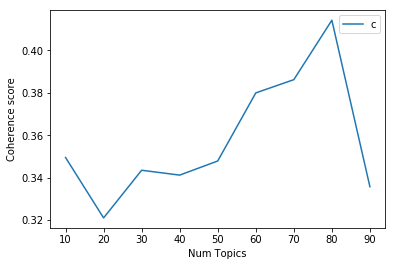

In [105]:
# Show graph
limit=100; start=10; step=10;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [106]:
# Select the model and print the topics
optimal_model = model_list[3]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))

[(4,
  '0.211*"hair" + 0.088*"shipping" + 0.037*"moisturizer" + 0.036*"style" + '
  '0.032*"acrylic" + 0.032*"healthy" + 0.029*"grandson" + 0.026*"shampoo" + '
  '0.025*"bath" + 0.022*"dry"'),
 (10,
  '0.132*"song" + 0.073*"draw" + 0.063*"album" + 0.059*"low" + 0.046*"artist" '
  '+ 0.041*"beautiful" + 0.034*"improvement" + 0.030*"sell" + 0.023*"birthday" '
  '+ 0.020*"performance"'),
 (9,
  '0.161*"fun" + 0.127*"son" + 0.057*"husband" + 0.051*"glad" + '
  '0.033*"enjoyment" + 0.032*"world" + 0.030*"sprint" + 0.025*"worry" + '
  '0.024*"chance" + 0.023*"controller"'),
 (26,
  '0.093*"baby" + 0.092*"change" + 0.089*"able" + 0.052*"cup" + 0.045*"coffee" '
  '+ 0.041*"tone" + 0.039*"drink" + 0.034*"wife" + 0.032*"extremely" + '
  '0.032*"crystal"'),
 (22,
  '0.152*"battery" + 0.138*"charge" + 0.063*"charger" + 0.049*"red" + '
  '0.049*"mix" + 0.033*"ball" + 0.031*"name" + 0.030*"regular" + '
  '0.027*"multiple" + 0.023*"cable"'),
 (7,
  '0.213*"color" + 0.118*"smell" + 0.066*"paint" + 0.0

In [ ]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

# Building LDA Mallet Model

In [102]:
import os
from gensim.models.wrappers import LdaMallet
os.environ.update({'MALLET_HOME':r'C:/Xiaomeng/mallet/'})
mallet_path = 'C:\\Xiaomeng\\mallet\\bin\\mallet' # update this path

#ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=3, id2word=id2word)

#result = (ldamallet.show_topics(num_topics=3, num_words=10,formatted=False))
#for each in result:
#print (each)
#os.environ['MALLET_HOME'] = 'C:/Users/Xiaomeng/OneDrive/Project/Category Dataframe/mallet'
#mallet_path = 'C:/Users/Xiaomeng/OneDrive/Project/Category Dataframe/mallet/bin/mallet' # update this path
#mallet_path = 'C:\Users\Xiaomeng\OneDrive\Project\Category Dataframe\mallet\bin\mallet' # update this path
ldamallet = LdaMallet(mallet_path, corpus=train, num_topics=30, id2word=id2word)

CalledProcessError: Command 'C:\Xiaomeng\mallet\bin\mallet import-file --preserve-case --keep-sequence --remove-stopwords --token-regex "\S+" --input C:\Users\Xiaomeng\AppData\Local\Temp\384278_corpus.txt --output C:\Users\Xiaomeng\AppData\Local\Temp\384278_corpus.mallet' returned non-zero exit status 1.

In [ ]:
# Show Topics
pprint(ldamallet.show_topics(formatted=False))

# Compute Coherence Score
coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\nCoherence Score: ', coherence_ldamallet)

In [83]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [121]:
# Build LDA model with the result from hyperparameter tuning
lda_model_2 = gensim.models.LdaMulticore(corpus=train,
                                           id2word=id2word,
                                           num_topics=30, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha=0.6,
                                            eta=0.05,
                                           per_word_topics=True)

lda_model_2.save("lda_model2_gensim")

In [122]:
theta, _ = lda_model_2.inference(train)
theta /= theta.sum(axis=1)[:, None]
theta_df_train = pd.DataFrame(theta)

theta, _ = lda_model_2.inference(test)
theta /= theta.sum(axis=1)[:, None]
theta_df_test = pd.DataFrame(theta)


from sklearn import svm
x = theta_df_train
y = list(all_data_df.iloc[train_index]['category'])

clf = svm.LinearSVC()
clf.fit(x,y)
result = clf.predict(theta_df_test)

i = 0
for y,y_pred in zip(all_data_df.iloc[test_index]['category'],result):
    if y == y_pred:
        i +=1
        
print(i/len(result)*100)

53.35352006056018


In [ ]:
lda_model_2 = gensim.models.LdaModel.load("lda_model2_gensim")
theta, _ = lda_model_2.inference(train)
theta /= theta.sum(axis=1)[:, None]
theta_df_test = pd.DataFrame(theta)
tsne = TSNE(n_components=2, perplexity=50)

# Clean and sample the data from each categories
#theta_df_clean = theta_df[ theta_df['category'] != "" ]
#theta_df_grouped = theta_df_clean.groupby(['category'])
#theta_df_grouped = theta_df_grouped.apply(lambda x: x.sample(frac=0.3))
# TSNE is taking too long for bigger dataset
reduced_X = theta_df_grouped.sample(n=6000)


tsne_data = tsne.fit_transform(reduced_X.ix[:, :30])
tsne_data = pd.DataFrame(tsne_data, columns=["dim1", "dim2"])
tsne_data.plot("dim1", "dim2", kind="scatter")

In [ ]:
tsne_data

In [ ]:
    # label_marker dictionary for true labels
    unqique_label = np.unique(result_df['labels_predict'].tolist())
    unqique_true_label = np.unique(result_df['label'].tolist())
    markers = ['o','*','s']
    keys = [str(x) for x in unqique_true_label]
    true_label_dict = dict(zip(keys, markers))
    
    for k in unqique_predict_label:
        result_df.loc[(result_df['labels_predict']== k),'color'] = label_dict[str(int(k))]
            
    for kt in unqique_true_label:
        result_df.loc[(result_df['label']== kt),'marker'] = true_label_dict[str(kt)]
    

In [124]:
# Compute Perplexity
print('\nPerplexity: ', lda_model_2.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model_2, corpus=test,texts=data_lemmatized, dictionary=id2word, coherence='c_npmi')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -7.176296894845806

Coherence Score:  0.018783704509758883


In [ ]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word,mds='tsne')
pyLDAvis.display(vis)

In [ ]:
#tsne_data['label'] = list(theta_df_test['category'])
from ggplot import *
ggplot(tsne_data, aes(x='dim1', y='dim2', color='category')) +\
    geom_point()